Epoch 1/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.7203 - loss: 0.5392 - val_accuracy: 0.8611 - val_loss: 0.3438
Epoch 2/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8727 - loss: 0.3154 - val_accuracy: 0.9046 - val_loss: 0.2466
Epoch 3/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9137 - loss: 0.2280 - val_accuracy: 0.9360 - val_loss: 0.1869
Epoch 4/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9350 - loss: 0.1786 - val_accuracy: 0.9451 - val_loss: 0.1512
Epoch 5/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9466 - loss: 0.1497 - val_accuracy: 0.9494 - val_loss: 0.1389
Epoch 6/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9495 - loss: 0.1387 - val_accuracy: 0.9547 - val_loss: 0.1231
Epoch 7/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9574 - loss: 0.1204 - val_accuracy: 0.9611 - val_loss: 0.1082
Epoch 8/50
2702/2702 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9595 - loss: 0.1

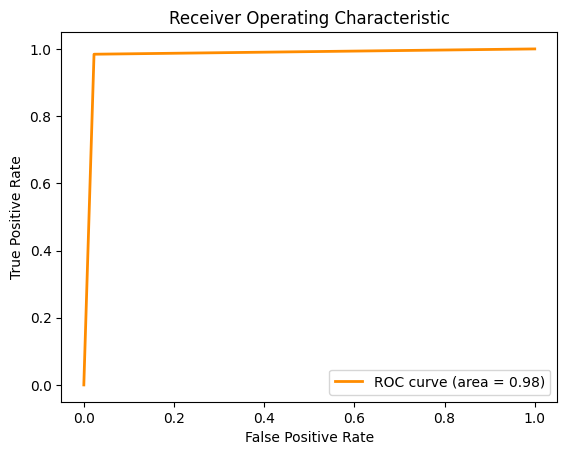

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc

# Load the dataset
df = pd.read_csv("mushroom_cleaned.csv")

# Select features and target
features = df[["cap-diameter", "cap-shape", "gill-attachment", "gill-color", "stem-height", "stem-width", "stem-color", "season"]]
target = df["class"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Classification Model
cls_model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary classification (edible or poisonous)
])
cls_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = cls_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

# Evaluate the model
y_pred = (cls_model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()